This notebook demonstrates some of the capabilities of the eegyolk library.

# Currently under rewrite

#### Imports

In [1]:
import mne      # toolbox for analyzing and visualizing EEG data
import os       # using operating system dependent functionality (folders)
import pandas   # data analysis and manipulation
import numpy    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
import glob
import numpy as np
from numpy.fft import fft, fftfreq
from scipy import signal

import matplotlib
import matplotlib.pyplot as plt

from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter


from IPython.display import clear_output
import warnings

import sys

Below eegyolk is importted in it's most updated version
But the cell could be replaced by importing the stable library and then importing the modules of it.

In [2]:

import sys
sys.path.insert(0, '../eegyolk') # path to helper functions
import helper_functions as hf # library useful for eeg and erp data cleaning
import initialization_functions #library to import data
import epod_helper

#### Load EEG files
Change eeg_file_root to path where the Dataset is located. Note for running on different files change eeg_file_root

In [3]:
data_path = "../../volume-ceph/ePodium_projectfolder"

In [4]:
eeg_file_root = data_path

Note we assume you are looking at bdf files

In [5]:
eeg_list = []
eeg_filenames = []
eeg_filelocation = []



pattern = os.path.join(eeg_file_root, '**/*.bdf')

files = glob.glob(pattern, recursive=True)

for file in files:
    if file.endswith('.bdf'):  # and len(file) == 8:
        BdfFile = mne.io.read_raw_bdf(file)
        eeg_list.append(BdfFile)
        eeg_filenames.append(file.replace(".bdf", ""))
        eeg_filelocation.append(file)
        clear_output(wait=True)
print(len(eeg_list), "EEG files loaded")

206 EEG files loaded


In [23]:
# eeg_filelocation

['../../volume-ceph/ePodium_projectfolder/dataset/105a.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/105b.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/107a.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/106a.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/106b.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/107b (deel 1+2).bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/109b.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/109a.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/107b (deel 3+4).bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/108a.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/110a.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/111b.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/110b.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/112a.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/112b.bdf',
 '../../volume-ceph/ePodium_projectfolder/dataset/111a.bdf',
 '

In [22]:
# eeg_filenames

['../../volume-ceph/ePodium_projectfolder/dataset/105a',
 '../../volume-ceph/ePodium_projectfolder/dataset/105b',
 '../../volume-ceph/ePodium_projectfolder/dataset/107a',
 '../../volume-ceph/ePodium_projectfolder/dataset/106a',
 '../../volume-ceph/ePodium_projectfolder/dataset/106b',
 '../../volume-ceph/ePodium_projectfolder/dataset/107b (deel 1+2)',
 '../../volume-ceph/ePodium_projectfolder/dataset/109b',
 '../../volume-ceph/ePodium_projectfolder/dataset/109a',
 '../../volume-ceph/ePodium_projectfolder/dataset/107b (deel 3+4)',
 '../../volume-ceph/ePodium_projectfolder/dataset/108a',
 '../../volume-ceph/ePodium_projectfolder/dataset/110a',
 '../../volume-ceph/ePodium_projectfolder/dataset/111b',
 '../../volume-ceph/ePodium_projectfolder/dataset/110b',
 '../../volume-ceph/ePodium_projectfolder/dataset/112a',
 '../../volume-ceph/ePodium_projectfolder/dataset/112b',
 '../../volume-ceph/ePodium_projectfolder/dataset/111a',
 '../../volume-ceph/ePodium_projectfolder/dataset/113a',
 '../../v

### Make a synthetic EEG like array
First we will show a filter on the array

In [7]:


sfreq = 1000. # signal collection frequency?
f_p = 40. # this is the stop freuqency, above which we should 0
flim = (1., sfreq / 2.)  # limits for plotting

In [8]:
# make something to filter
dur = 10.
center = 2.
morlet_freq = f_p
tlim = [center - 0.2, center + 0.2]
tticks = [tlim[0], center, tlim[1]]
flim = [20, 70]

x = np.zeros(int(sfreq * dur) + 1)
blip = morlet(sfreq, [morlet_freq], n_cycles=7)[0].imag / 20.
n_onset = int(center * sfreq) - len(blip) // 2
x[n_onset:n_onset + len(blip)] += blip
x_orig = x.copy()

rng = np.random.RandomState(0)
x += rng.randn(len(x)) / 1000.
x += np.sin(2. * np.pi * 60. * np.arange(len(x)) / sfreq) / 2000.

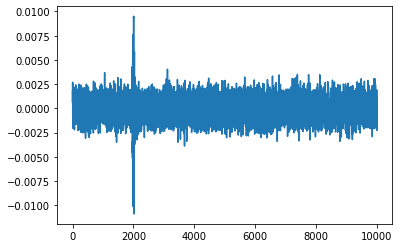

In [9]:
plt.plot(x)

## Download sample data from MNE library
The below is cell is commented out as it may be skipped if you have the data

In [10]:
# sample_data_folder = mne.datasets.sample.data_path()
# sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
#                                     'sample_audvis_raw.fif')
# raw = mne.io.read_raw_fif(sample_data_raw_file)
# # use just 60 seconds of data and mag channels, to save memory
# raw.crop(0, 60).pick_types(meg='mag', stim=True).load_data()

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 671GB/s]
Untarring contents of '/home/cmoore/mne_data/MNE-sample-data-processed.tar.gz' to '/home/cmoore/mne_data'


Attempting to create new mne-python configuration file:
/home/cmoore/.mne/mne-python.json
Opening raw data file /home/cmoore/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw | sample_audvis_raw.fif, 111 x 36038 (60.0 s), ~33.6 MB, data loaded>

Let's see what filtering looks like visually if we pull out low frequencies

Using matplotlib as 2D backend.
Opening raw-browser...


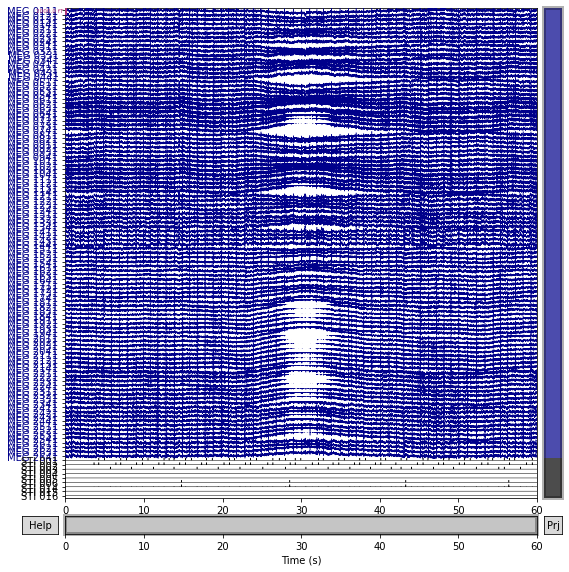

In [11]:
with mne.viz._figure.use_browser_backend('matplotlib'):
        fig = raw.plot(duration=60, proj=False,
                                n_channels=len(raw.ch_names), remove_dc=False)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 9911 samples (16.501 sec)

Opening raw-browser...


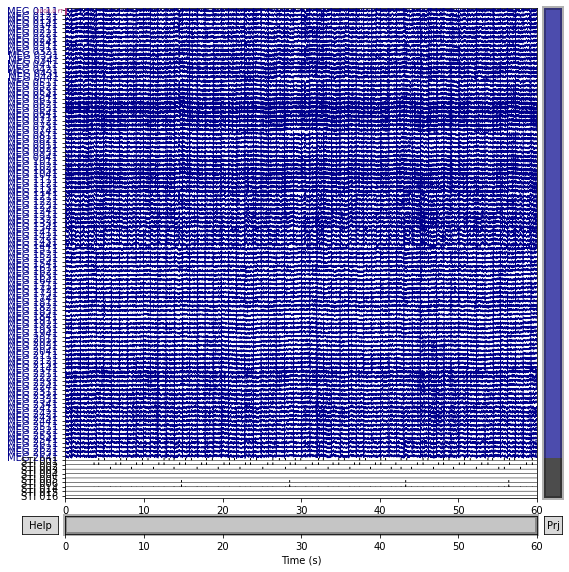

Text(0.5, 0.98, 'High-pass filtered at 0.2 Hz')

In [12]:
#for cutoff in (0.1, 0.2):
cutoff = 0.2
raw_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
with mne.viz._figure.use_browser_backend('matplotlib'):
    fig = raw_highpass.plot(duration=60, proj=False,
                            n_channels=len(raw.ch_names), remove_dc=False)
fig.subplots_adjust(top=0.9)
fig.suptitle('High-pass filtered at {} Hz'.format(cutoff), size='xx-large',
             weight='bold')

In [16]:
raw_simple_filtered = hf.band_pass_filter(raw, 0.2, 5)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 5.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Filter length: 9911 samples (16.501 sec)



In [17]:
## we can check channel names
#raw_simple_filtered.ch_names

In [13]:
## we can know more about the data 
#help(raw_simple_filtered)

In [18]:
# but let's just check our filter on the lowpass end to see what frequency is there
raw_simple_filtered.info['lowpass']

5.0

In [20]:
# vars(raw_simple_filtered)

In [21]:
print(type(raw.info['lowpass']))

<class 'float'>


## Now let's get back to real EEGs that we have

In [27]:
sample_eeg = eeg_filelocation[3]

In [28]:
sample_eeg

'../../volume-ceph/ePodium_projectfolder/dataset/106a.bdf'

In [38]:
sample_eeg_read = mne.io.read_raw_bdf(sample_eeg, preload= True)

Extracting EDF parameters from /home/cmoore/volume-ceph/ePodium_projectfolder/dataset/106a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3215359  =      0.000 ...  1570.000 secs...


In [39]:
sample_eeg_filtered = hf.band_pass_filter(sample_eeg_read, 0, 2.38540286e-05)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 2.4e-05 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 0.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Filter length: 3381 samples (1.651 sec)



In [ ]:
!